In [1]:
import efel

from bluepy.v2 import Simulation

from bluepy.v2 import Circuit
from bluepy.v2 import Cell
from bluepy.v2.enums import Synapse

from os import path

import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
import pickle


In [ ]:
#mean_freq = 'mean_frequency'
#efel.getFeatureNames()

In [ ]:
# um with full met, thalam inputs

# mc2
# 5 sec

um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_v3_all_23nov2020_2020112308.txt",header=None)


In [2]:
# um with full met, one pulse

# mc2
# 5 sec

um1 = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_onepulse_2020112211.txt",header=None)
um2 = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_onepulse_2020112212.txt",header=None)

um = pd.concat([um1,um2],ignore_index = True)

/gpfs/bbp.cscs.ch/ssd/apps/hpc/jenkins/deploy/libraries/2020-02-01/linux-rhel7-x86_64/gcc-8.3.0/py-ipython-7.4.0-stqp435aw2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# um with full met, no stim

# mc2
# 5 sec

um1 = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_nostim_2020112211.txt",header=None)
um2 = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_nostim_2020112212.txt",header=None)

um = pd.concat([um1,um2],ignore_index = True)

/gpfs/bbp.cscs.ch/ssd/apps/hpc/jenkins/deploy/libraries/2020-02-01/linux-rhel7-x86_64/gcc-8.3.0/py-ipython-7.4.0-stqp435aw2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# um with full met

# 230 cells
# 10 sec

um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_202011041221.txt",header=None)


In [ ]:
# um with gen met: met_general

# Calv no layers

um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_2020111812.txt",header=None)


In [2]:
# um with gen met:  met_gen_onepulse

# Calv no layers

um1 = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_gen_onepulse_2020112211.txt",header=None)
um2 = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_gen_onepulse_2020112211.txt",header=None)

um = pd.concat([um1,um2],ignore_index = True)

In [3]:
um_colnames = ["c_gid","mpi_rank","idxm","VNeu0", "m0", "h0", "n0", "Conc_Cl_out", "Conc_Cl_in", "Na0in", "K0out", "Glc_b", "Lac_b", "O2_b", "q", "Glc_ecs", "Lac_ecs", "O2_ecs", "O2_n", "O2_a", "Glc_n", "Glc_a", "Lac_n", "Lac_a", "Pyr_n", "Pyr_a", "PCr_n", "PCr_a", "Cr_n", "Cr_a", "ATP_n", "ATP_a", "ADP_n", "ADP_a", "NADH_n", "NADH_a", "NAD_n", "NAD_a", "ksi","ksi_ephys"]
print(len(um_colnames))

um.columns =  um_colnames

um = um.add_prefix('with_met_')


40


In [3]:
um_colnames = ["c_gid","mpi_rank","idxm","VNeu0", "m0", "h0", "n0", "Conc_Cl_out", "Conc_Cl_in", "Na0in", "K0out", "Glc_b", "Lac_b", "O2_b", "q", "Glc_ecs", "Lac_ecs", "O2_ecs", "O2_n", "O2_a", "Glc_n", "Glc_a", "Lac_n", "Lac_a", "Pyr_n", "Pyr_a", "PCr_n", "PCr_a", "Cr_n", "Cr_a", "ATP_n", "ATP_a", "ADP_n", "ADP_a", "NADH_n", "NADH_a", "NAD_n", "NAD_a", "ksi", "ksi_ephys", "G6P_n", "F6P_n", "G6P_a", "F6P_a", "FBP_n", "FBP_a", "AMP_a", "GAP_n", "DHAP_n", "GAP_a", "DHAP_a", "Pi_n", "BPG13_n", "Pi_a", "BPG13_a", "PG3_n", "PG3_a", "PG2_n", "PG2_a", "PEP_n", "PEP_a", "G1P_a", "GLY_a", "UDPgluco", "UTP", "PP1_a", "GS_a", "GPa_a", "GPb_a", "cAMP_a", "PKAa_a", "PKAb_a", "PHKa_a", "R2CcAMP2_a", "R2CcAMP4_a", "K_a0", "Na_a0", "Va0", "Ca_a", "GLUT_out", "GLUT_a", "GLN_out", "GLN_a", "GLUT_syn", "f26bp_a0", "f26bp_n0", "PYRmito_n0", "CITmito_n0", "ISOCITmito_n0", "AKGmito_n0", "SUCCOAmito_n0", "SUCmito_n0", "FUMmito_n0", "MALmito_n0", "OXAmito_n0", "AcCoAmito_n0", "CoAmito_n0", "NADmito_n0", "NADHmito_n0", "CaMito_n0", "ADPmito_n0", "ATPmito_n0", "Pimito_n0", "Qmito_n0", "QH2mito_n0", "CytCredmito_n0", "CytCoxmito_n0", "ASPmito_n0", "GLUmito_n0", "MAL_n0", "OXA_n0", "ASP_n0", "AKG_n0", "GL6P_n0", "GO6P_n0", "NADP_n0", "NADPH_n0", "RU5P_n0", "X5P_n0", "R5P_n0", "S7P_n0", "E4P_n0", "PYRmito_a", "CITmito_a", "ISOCITmito_a", "AKGmito_a", "SUCCOAmito_a", "SUCmito_a", "FUMmito_a", "MALmito_a", "OXAmito_a", "AcCoAmito_a", "CoAmito_a", "NADmito_a", "NADHmito_a", "CaMito_a", "ADPmito_a", "ATPmito_a", "Pimito_a", "Qmito_a", "QH2mito_a", "CytCredmito_a", "CytCoxmito_a", "ASPmito_a", "GLUmito_a", "MAL_a", "OXA_a", "ASP_a", "AKG_a", "GL6P_a", "GO6P_a", "NADP_a", "NADPH_a", "RU5P_a", "X5P_a", "R5P_a", "S7P_a", "E4P_a", "GSH_a", "GSSG_a", "GSH_n", "GSSG_n", "MitoMembrPotent_a", "MitoMembrPotent_n", "GLU_n", "NEneuromod", "AMP_n", "GLN_n", "GABA_inh_n","Vv","dHb"]

print(len(um_colnames))

um.columns =  um_colnames

um = um.add_prefix('with_met_')


171


In [4]:
um = um.rename(columns={"with_met_c_gid":"c_gid",
                        "with_met_mpi_rank":"mpi_rank",
                        "with_met_idxm":"idxm"})

um.index = um['c_gid']

um_main = um[['c_gid','idxm','with_met_ATP_n']].copy()
print(len(um_main))

um_main = um_main.loc[um_main['with_met_ATP_n'] != " nan",:]

print(len(um_main))

um_main['with_met_ATP_n'] = um_main['with_met_ATP_n'].astype(float)

um_main = um_main.reset_index(drop=True)

um_main_g = um_main[['c_gid','with_met_ATP_n']].groupby('c_gid').mean()

um_main_g = um_main_g.reset_index()



213700
213534


In [5]:
len(um['c_gid'].unique())

21370

In [2]:
c = Circuit('/gpfs/bbp.cscs.ch/project/proj64/circuits/O1.v6a/20181207/CircuitConfig')
mc2_cells = c.cells.get({'$target': 'mc2_Column'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.ETYPE,Cell.MTYPE,Cell.ME_COMBO,Cell.LAYER])

onepercent_gids = np.loadtxt("/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/mc2_onepercent_allLayers_EXCandINH_gids.txt")

onepercent = mc2_cells.loc[onepercent_gids,:]

In [ ]:
with open('/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/out_data/soma_vmv_met_gen_thal.pickle', 'rb') as handle:
    feature_values = pickle.load(handle)

In [6]:
# python getMeanFreq.py /gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_v3_all_23nov2020/BlueConfig ../out_data/soma_vmv_met_full_thal_23nov2020.pickle

with open('/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/out_data/soma_vmv_met_full_thal_23nov2020.pickle', 'rb') as handle:
    feature_values = pickle.load(handle)

In [6]:
#python getMeanFreq.py /gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_onepulse/BlueConfig ../out_data/soma_vmv_met_onepulse.pickle

with open('/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/out_data/soma_vmv_met_onepulse.pickle', 'rb') as handle:
    feature_values = pickle.load(handle)

In [7]:
#python getMeanFreq.py /gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_nostim/BlueConfig ../out_data/soma_vmv_met_nostim.pickle

with open('/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/out_data/soma_vmv_met_nostim.pickle', 'rb') as handle:
    feature_values = pickle.load(handle)

In [7]:
with open('/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/out_data/soma_vmv_met_gen_onepulse.pickle', 'rb') as handle:
    feature_values = pickle.load(handle)

In [3]:
#nomet thal

with open('/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/out_data/soma_vmv_nomet_18nov2020.pickle', 'rb') as handle:
    feature_values = pickle.load(handle)

In [3]:
#nomet onepulse

with open('/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/out_data/soma_vmv_nomet_onepulse_19nov2020.pickle', 'rb') as handle:
    feature_values = pickle.load(handle)

In [3]:
#nomet nostim

with open('/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/out_data/soma_vmv_nomet_nostim.pickle', 'rb') as handle:
    feature_values = pickle.load(handle)

In [4]:
fr = pd.DataFrame(feature_values.items(),columns = ['c_gid','mean_frequency'])
fr['c_gid']=fr['c_gid'].astype(int)

In [5]:
np.max(fr['mean_frequency'])

285.71428571428555

In [10]:
um_main_g['c_gid']=um_main_g['c_gid'].astype(int)

In [11]:
combo = pd.merge(um_main_g, fr, left_on='c_gid',right_on='c_gid',how="inner")

In [12]:
combo.index = combo['c_gid']
combo = combo.drop(columns='c_gid')

In [13]:
combo_feat = pd.merge(mc2_cells, combo, left_index=True,right_index=True, how='inner') # or onepercent instead of mc2_cells

combo_feat['with_met_ATP_n'] = combo_feat['with_met_ATP_n'].astype(float)

In [17]:
# gen met thalam stim
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_general/BlueConfig')
report = sim.report('ATPConcAllCmps', source='h5')
atp = report.get()
atp = atp.reset_index()
atp.head()

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.


gid,time,2,3,6,11,21,31,39,48,49,...,163211,163221,163231,163241,163250,163254,163255,163257,163260,163263
0,0.0,1.399999,1.399999,1.399999,1.399999,1.399999,1.399999,1.399999,1.399999,1.399999,...,1.399997,1.400000,1.399999,1.399999,1.399997,1.399999,1.400000,1.399999,1.399998,1.399998
1,1.0,1.399691,1.399255,1.399255,1.399385,1.399405,1.398178,1.398650,1.399801,1.399624,...,1.398388,1.399738,1.399377,1.399538,1.397643,1.399172,1.399332,1.399398,1.398852,1.397292
2,2.0,1.399384,1.398511,1.398511,1.398771,1.398811,1.396359,1.397301,1.399603,1.399249,...,1.396779,1.399477,1.398755,1.399077,1.395291,1.398346,1.398665,1.398796,1.397707,1.394590
3,3.0,1.399076,1.397767,1.397766,1.398157,1.398217,1.394541,1.395953,1.399405,1.398874,...,1.395172,1.399216,1.398134,1.398616,1.392942,1.397520,1.397997,1.398195,1.396563,1.391891
4,4.0,1.398768,1.397023,1.397023,1.397544,1.397624,1.392724,1.394606,1.399207,1.398499,...,1.393565,1.398955,1.397513,1.398155,1.390594,1.396695,1.397330,1.397594,1.395419,1.389194


In [13]:
# full met thalam stim
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_v3_all_23nov2020/BlueConfig')
report = sim.report('ATPConcAllCmps', source='h5')
atp = report.get()
atp = atp.reset_index()
atp.head()

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.


gid,time,2,3,6,11,21,31,39,48,49,...,163211,163221,163231,163241,163250,163254,163255,163257,163260,163263
0,0.0,1.399999,1.399999,1.399999,1.399999,1.399999,1.399999,1.399999,1.399999,1.399999,...,1.399997,1.400000,1.399999,1.399999,1.399997,1.399999,1.400000,1.399999,1.399998,1.399998
1,1.0,1.399240,1.399255,1.399327,1.399255,1.399624,1.398178,1.398650,1.399801,1.399624,...,1.397409,1.399738,1.399242,1.399538,1.399004,1.399608,1.399651,1.399688,1.399087,1.397370
2,2.0,1.398481,1.398511,1.398655,1.398510,1.399249,1.396359,1.397301,1.399603,1.399249,...,1.394824,1.399477,1.398485,1.399077,1.398012,1.399218,1.399303,1.399376,1.398177,1.394745
3,3.0,1.397723,1.397767,1.397982,1.397766,1.398874,1.394541,1.395953,1.399405,1.398874,...,1.392242,1.399216,1.397729,1.398616,1.397020,1.398827,1.398955,1.399065,1.397267,1.392122
4,4.0,1.396964,1.397023,1.397311,1.397022,1.398499,1.392724,1.394606,1.399207,1.398499,...,1.389662,1.398955,1.396972,1.398155,1.396028,1.398437,1.398607,1.398753,1.396358,1.389503


In [13]:
# full met one pulse
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_onepulse/BlueConfig')
report = sim.report('ATPConcAllCmps', source='h5')
atp = report.get()
atp = atp.reset_index()

atp_t = atp.transpose()

atp_t.columns = atp_t.loc['time',:]


atp_t.drop(atp_t.index[0], inplace=True)

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.


In [ ]:
# full met no stim
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_nostim/BlueConfig')
report = sim.report('ATPConcAllCmps', source='h5')
atp = report.get()
atp = atp.reset_index()

atp_t = atp.transpose()

atp_t.columns = atp_t.loc['time',:]


atp_t.drop(atp_t.index[0], inplace=True)

In [14]:
# gen met onepulse
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_gen_onepulse/BlueConfig')
report = sim.report('ATPConcAllCmps', source='h5')
atp = report.get()
atp = atp.reset_index()

atp_t = atp.transpose()

atp_t.columns = atp_t.loc['time',:]


atp_t.drop(atp_t.index[0], inplace=True)

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.


In [6]:
# nomet thal
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/nomet_18nov2020/BlueConfig')
report = sim.report('ATPConcAllCmps', source='h5')
atp = report.get()
atp = atp.reset_index()

atp_t = atp.transpose()

atp_t.columns = atp_t.loc['time',:]


atp_t.drop(atp_t.index[0], inplace=True)

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.


In [6]:
# nomet onepulse
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/nomet_onepulse_19nov2020/BlueConfig')
report = sim.report('ATPConcAllCmps', source='h5')
atp = report.get()
atp = atp.reset_index()

atp_t = atp.transpose()

atp_t.columns = atp_t.loc['time',:]


atp_t.drop(atp_t.index[0], inplace=True)

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.


In [6]:
# nomet nostim
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/nomet_nostim/BlueConfig')
report = sim.report('ATPConcAllCmps', source='h5')
atp = report.get()
atp = atp.reset_index()

atp_t = atp.transpose()

atp_t.columns = atp_t.loc['time',:]


atp_t.drop(atp_t.index[0], inplace=True)

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.


In [7]:
#atp_t['mean'] = atp_t.mean(axis=1)

#atp_t['diff'] =  atp_t[0.0] - atp_t[4999.0]

atp_t['diff'] =  ((atp_t[0.0] - atp_t[999.0]) + (atp_t[1000.0] - atp_t[1999.0]) + (atp_t[2000.0] - atp_t[2999.0])+ (atp_t[3000.0] - atp_t[3999.0]) + (atp_t[4000.0] - atp_t[4999.0]))/5

#atp_t['diff'] = atp_t[0.0] - atp_t[999.0]

#atp_t['diff'] =  ((atp_t[0.0] - atp_t[999.0])/np.nanmean(atp_t[0:999]) +
#                  (atp_t[1000.0] - atp_t[1999.0])/np.nanmean(atp_t[1000:1999]) +
#                  (atp_t[2000.0] - atp_t[2999.0])/np.nanmean(atp_t[2000:2999]) +
#                  (atp_t[3000.0] - atp_t[3999.0])/np.nanmean(atp_t[3000:3999]) +
#                  (atp_t[4000.0] - atp_t[4999.0])/np.nanmean(atp_t[4000:4999]))/5

In [8]:
#atp2 = pd.DataFrame(atp_t.loc[:,'mean'])
atp2 = pd.DataFrame(atp_t.loc[:,'diff'])

In [9]:
print(len(atp2))
atp2 = atp2.loc[~atp2['diff'].isna()]
print(len(atp2))

22918
22890


In [10]:
# with um
#combo2 = pd.merge(atp2, combo_feat, left_index=True,right_index=True, how='inner')

# no um
fr.index = fr['c_gid']
combo2 = pd.merge(atp2, fr, left_index=True,right_index=True, how='inner')

#combo2 = combo2.rename(columns = {'mean':'meanATPconc'})
combo2 = combo2.rename(columns = {'diff':'deltaATPconc'})


combo3 = pd.merge(combo2, mc2_cells, left_index=True,right_index=True, how='inner')

#combo2.head()
# mean is mean ATP conc from ndam reports

In [11]:
len(fr['c_gid'].unique())

22918

In [12]:
len(atp2.index.unique())

22882

In [13]:
len(combo2.index.unique())

22882

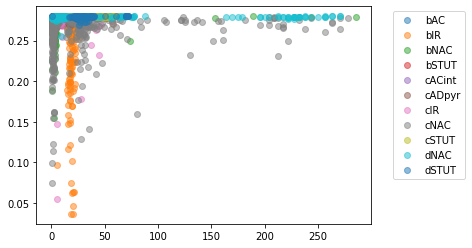

In [11]:
groups = combo3.groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPconc'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

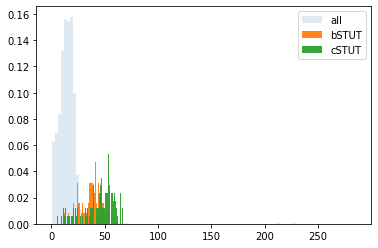

In [28]:
# gen met
bins = 100 #numpy.linspace(min(), 10, 100)

plt.hist(combo2['mean_frequency'], weights=np.ones(len(combo2['mean_frequency'])) / len(combo2['mean_frequency']), bins=bins, alpha=0.15, label='all')
plt.hist(combo2.loc[combo2['etype']=='bSTUT','mean_frequency'], weights=np.ones(len(combo2.loc[combo2['etype']=='bSTUT','mean_frequency'])) / len(combo2.loc[combo2['etype']=='bSTUT','mean_frequency']),  bins=bins, alpha=0.95, label='bSTUT')
plt.hist(combo2.loc[combo2['etype']=='cSTUT','mean_frequency'], weights=np.ones(len(combo2.loc[combo2['etype']=='cSTUT','mean_frequency'])) / len(combo2.loc[combo2['etype']=='cSTUT','mean_frequency']),  bins=bins, alpha=0.95, label='cSTUT')

plt.legend(loc='upper right')
plt.show()


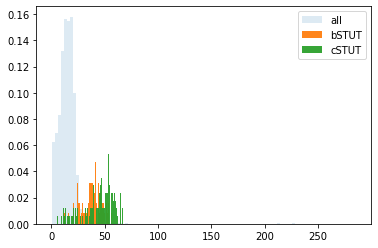

In [65]:
#full met

bins = 100 #numpy.linspace(min(), 10, 100)

plt.hist(combo2['mean_frequency'], weights=np.ones(len(combo2['mean_frequency'])) / len(combo2['mean_frequency']), bins=bins, alpha=0.15, label='all')
plt.hist(combo2.loc[combo2['etype']=='bSTUT','mean_frequency'], weights=np.ones(len(combo2.loc[combo2['etype']=='bSTUT','mean_frequency'])) / len(combo2.loc[combo2['etype']=='bSTUT','mean_frequency']),  bins=bins, alpha=0.95, label='bSTUT')
plt.hist(combo2.loc[combo2['etype']=='cSTUT','mean_frequency'], weights=np.ones(len(combo2.loc[combo2['etype']=='cSTUT','mean_frequency'])) / len(combo2.loc[combo2['etype']=='cSTUT','mean_frequency']),  bins=bins, alpha=0.95, label='cSTUT')

plt.legend(loc='upper right')
plt.show()


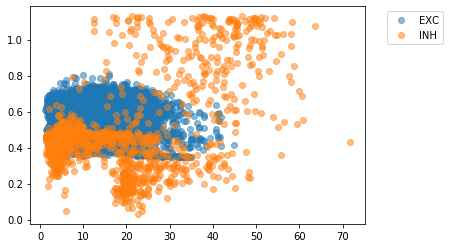

In [24]:
groups = combo2.groupby('synapse_class')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.mean_frequency, group.deltaATPconc, marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

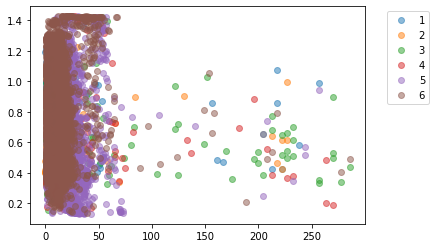

In [32]:
groups = combo2.groupby('layer')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'with_met_ATP_n'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [25]:
np.max(combo2['mean_frequency'])

71.61754095298504

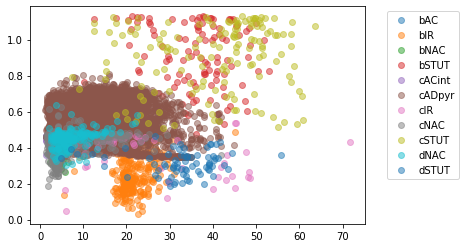

In [26]:
groups = combo2.groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPconc'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

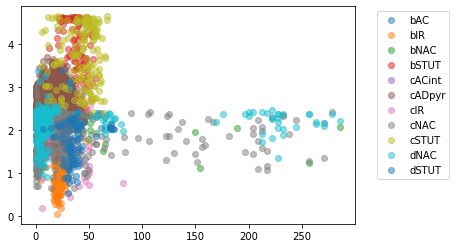

In [69]:
groups = combo2.groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPconc'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

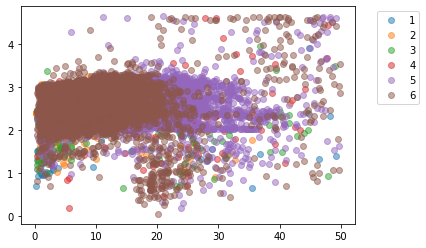

In [70]:
groups = combo2.groupby('layer')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[group['mean_frequency']<50,'mean_frequency'], group.loc[group['mean_frequency']<50,'deltaATPconc'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

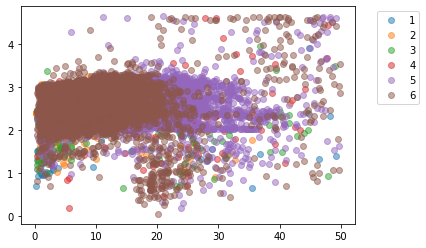

In [71]:
groups = combo2.groupby('layer')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[group['mean_frequency']<50,'mean_frequency'], group.loc[group['mean_frequency']<50,'deltaATPconc'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

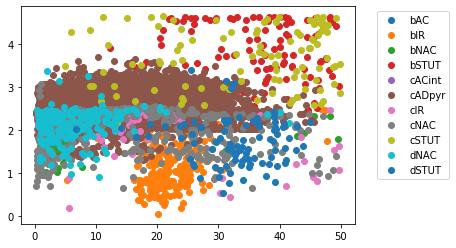

In [72]:
groups = combo2.groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[group['mean_frequency']<50,'mean_frequency'], group.loc[group['mean_frequency']<50,'deltaATPconc'], marker='.', linestyle='', ms=12, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

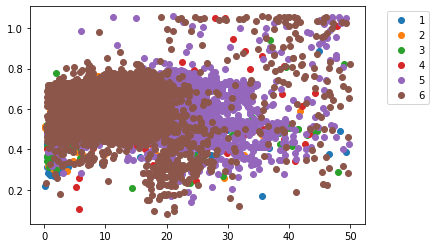

In [39]:
groups = combo2.groupby('layer')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[group['mean_frequency']<50,'mean_frequency'], group.loc[group['mean_frequency']<50,'deltaATPconc'], marker='.', linestyle='', ms=12, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

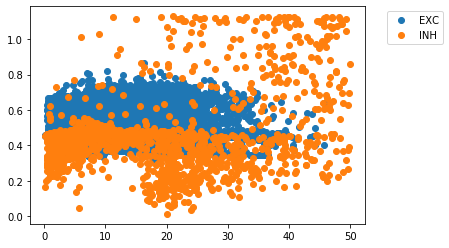

In [36]:
groups = combo2.groupby('synapse_class')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[group['mean_frequency']<50,'mean_frequency'], group.loc[group['mean_frequency']<50,'deltaATPconc'], marker='.', linestyle='', ms=12, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

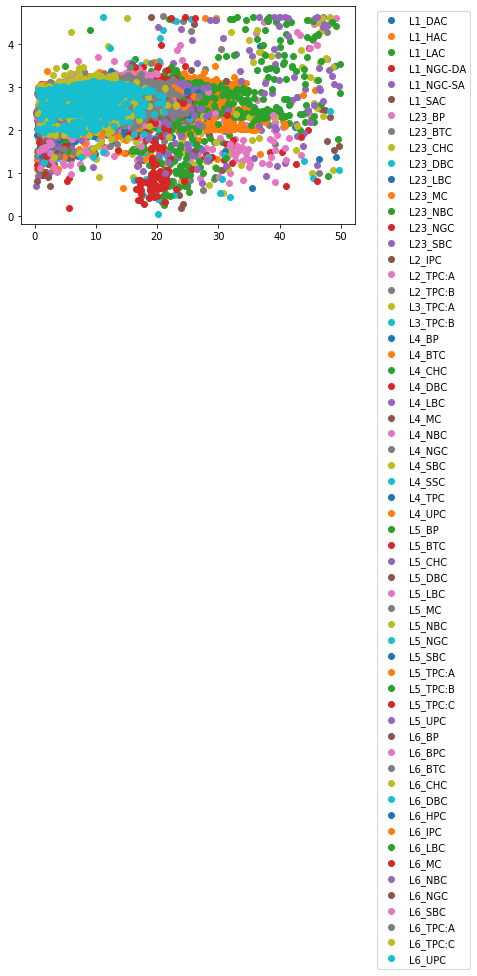

In [73]:
groups = combo2.groupby('mtype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[group['mean_frequency']<50,'mean_frequency'], group.loc[group['mean_frequency']<50,'deltaATPconc'], marker='.', linestyle='', ms=12, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

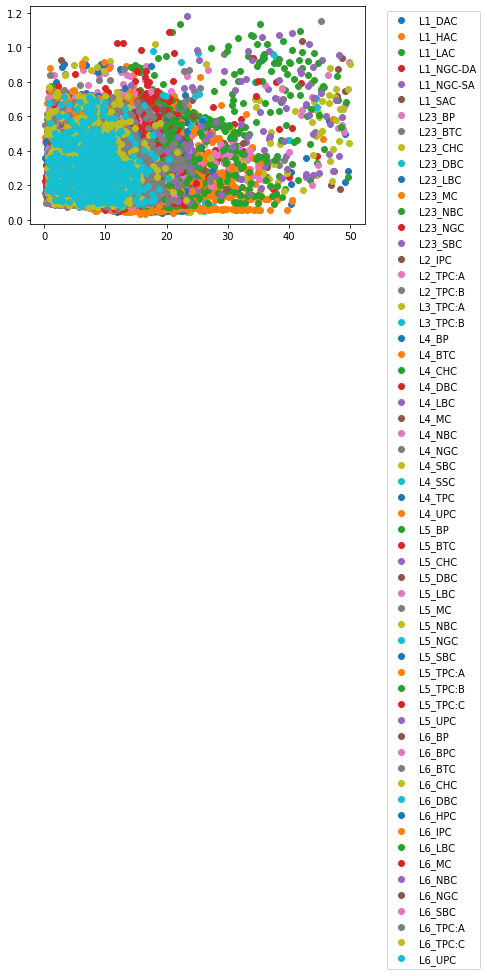

In [75]:
groups = combo2.groupby('mtype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[group['mean_frequency']<50,'mean_frequency'], group.loc[group['mean_frequency']<50,'meanATPconc'], marker='.', linestyle='', ms=12, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

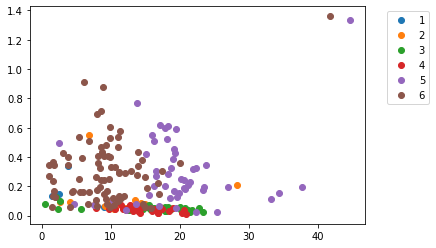

In [18]:
groups = combo_feat.groupby('layer')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[group['mean_frequency']<50,'mean_frequency'], group.loc[group['mean_frequency']<50,'with_met_ATP_n'], marker='.', linestyle='', ms=12, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

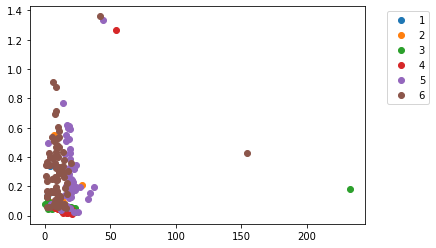

In [19]:
groups = combo_feat.groupby('layer')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.mean_frequency, group.with_met_ATP_n, marker='.', linestyle='', ms=12, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

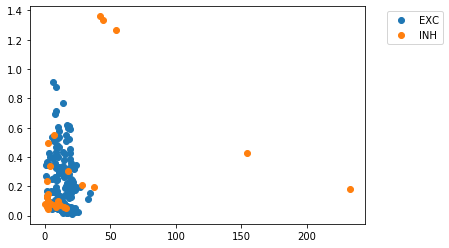

In [20]:
groups = combo_feat.groupby('synapse_class')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.mean_frequency, group.with_met_ATP_n, marker='.', linestyle='', ms=12, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

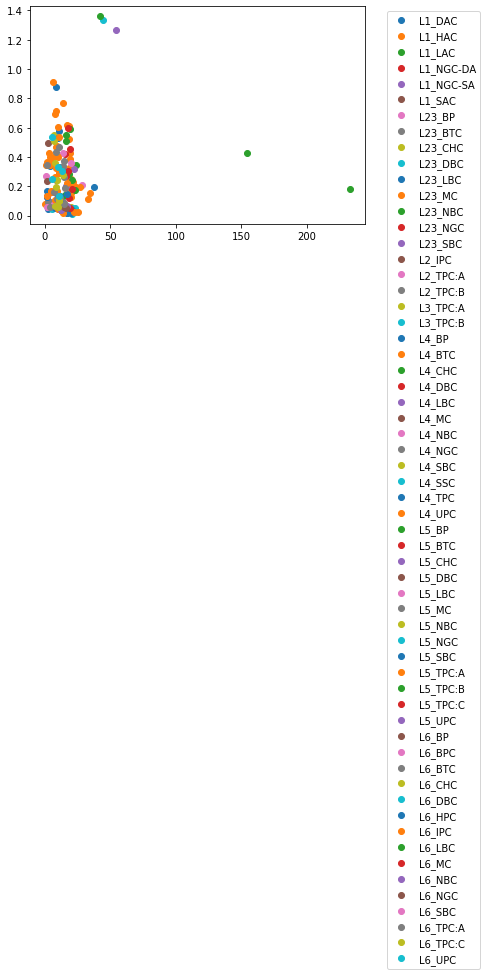

In [21]:
groups = combo_feat.groupby('mtype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.mean_frequency, group.with_met_ATP_n, marker='.', linestyle='', ms=12, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

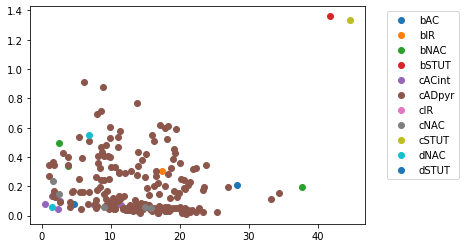

In [23]:
groups = combo_feat.groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[group['mean_frequency']<50,'mean_frequency'], group.loc[group['mean_frequency']<50,'with_met_ATP_n'], marker='.', linestyle='', ms=12, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

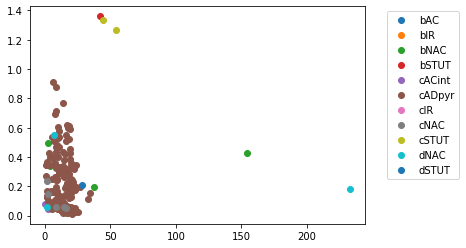

In [24]:
groups = combo_feat.groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.mean_frequency, group.with_met_ATP_n, marker='.', linestyle='', ms=12, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

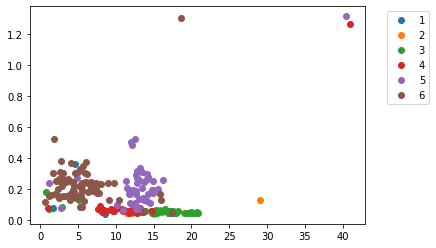

In [91]:
groups = combo_feat.groupby('layer')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.mean_frequency, group.with_met_ATP_n, marker='.', linestyle='', ms=12, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

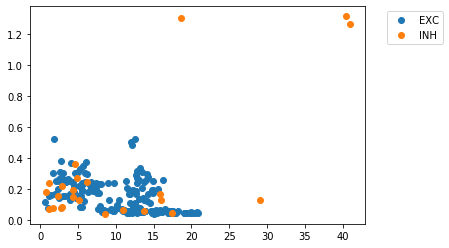

In [86]:
groups = combo_feat.groupby('synapse_class')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.mean_frequency, group.with_met_ATP_n, marker='.', linestyle='', ms=12, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

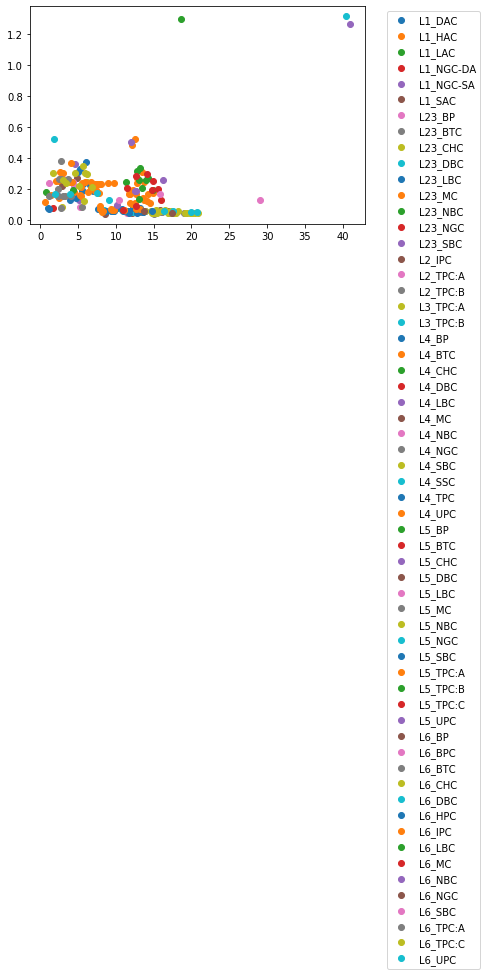

In [85]:
groups = combo_feat.groupby('mtype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.mean_frequency, group.with_met_ATP_n, marker='.', linestyle='', ms=12, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

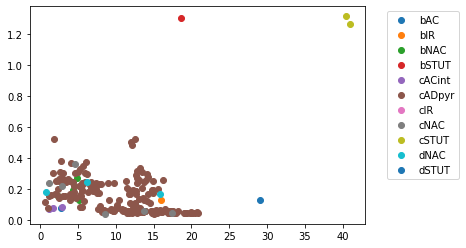

In [84]:
groups = combo_feat.groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.mean_frequency, group.with_met_ATP_n, marker='.', linestyle='', ms=12, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

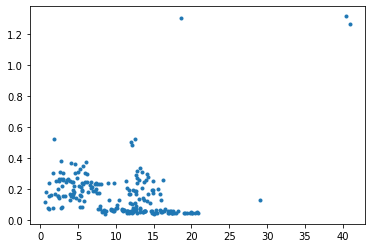

In [75]:
plt.plot(combo_feat['mean_frequency'],combo_feat['with_met_ATP_n'],'.')
plt.show()